In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 60.2 MB/s eta 0:00:00


In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [5]:
import matplotlib.colors as mcolors


In [6]:
import warnings
warnings.filterwarnings("ignore")


In [9]:

# Load the lon, lat, and data arrays from .npy files
lon_arrays = [np.load(f'lon_array_{i}.npy') for i in range(4)]
lat_arrays = [np.load(f'lat_array_{i}.npy') for i in range(4)]
data_arrays = [np.load(f'data_array_{i}.npy') for i in range(4)]



# Now you can use these arrays for plotting or further processing

In [10]:
colors = ['#7fcce0', '#3f479b', '#544596', '#534694', '#754898', '#9b4696', '#bd4896','#d13b8d','#e50f7c','#e4034b','#e3030e','#e11108','#e34b05','#f18901','#fcc903','#f5e707','#cfd600','#a2c60e','#7ebc20','#6fb528','#72b628','#74bd6b']  # Define the colors you want
len(colors)

22

In [11]:
bounds = [0,25,50,75,100,150,200,300,400,500,600,700,800,900,1000,1250,1750,2000,3000, 4000, 5000,6000,7000]  # Adjust these based on your data range
len(bounds)

23

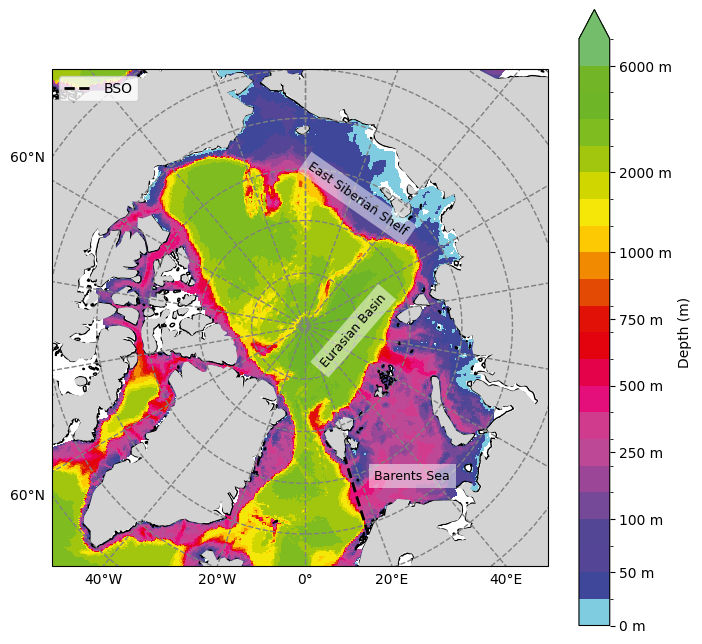

In [37]:
# Create the plot
# plt.rcParams['font.family'] = 'Times New Roman'

subplot_kw = {"projection": ccrs.Orthographic(central_longitude=0, central_latitude=90)}
fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw=subplot_kw, figsize=(8, 8))

# Set the extent if needed (uncomment if you want to zoom in on
#ax.set_extent([-180, 180, 70, 90], crs=ccrs.PlateCarree())

cmap = mcolors.ListedColormap(colors)

# Define color boundaries (the range for the colors)
norm = mcolors.BoundaryNorm(bounds, cmap.N)

for i in range(4):
    lon = lon_arrays[i]
    lat = lat_arrays[i]
    data = data_arrays[i]

    # Handle NaNs in lon, lat, and data
    lon[np.isnan(lon)] = np.nanmin(lon) - 1  # fill with near values to avoid errors
    lat[np.isnan(lat)] = np.nanmin(lat) - 1
    data[np.isnan(lon)] = np.nan
    data[np.isnan(lat)] = np.nan

    # Create the plot using pcolormesh
    C = ax.pcolormesh(
        lon,
        lat,
        data,  # First time step, 0 depth, tile
        transform=ccrs.PlateCarree(),  # Project using PlateCarree for longitude/latitude
        cmap=cmap,
        norm=norm,
    )



    #ax.set_global()
    ax.set_extent([-180, 180, 65, 90], crs=ccrs.PlateCarree())


    #ax.set_title("Bathymetry of the A")

# Add a colorbar


cbar = fig.colorbar(C, ax=ax, orientation='vertical', label="Depth (m)",extend="max")

# Set custom ticks and labels
tick_values = [0,50,100,250,500,750,1000,2000,6000]
cbar.set_ticks(tick_values)  # Set tick positions
cbar.set_ticklabels([f'{tick} m' for tick in tick_values])  # Add custom labels with "m" suffix


# Optional: Uncomment to add coastlines or land features
ax.coastlines()
ax.add_feature(cfeature.LAND.with_scale('110m'), zorder=2, facecolor="lightgray")


# add the lat long lines

gl = ax.gridlines(
    draw_labels=True,
    crs=ccrs.PlateCarree(),
    color='gray',
    linestyle='--',
    linewidth=1,
    xlocs=np.arange(-180, 181, 20),  # Longitude gridline interval
    ylocs=np.arange(60, 91, 5)  # Latitude gridline interval
)
gl.top_labels = False  # Turn off the top labels
gl.right_labels = False  # Turn off the right labels

# Add the label for the Barents Sea
ax.text(
    35, 72,  # Approximate coordinates of the Barents Sea
    'Barents Sea',
    horizontalalignment='center',
    transform=ccrs.PlateCarree(),
    fontsize=9,
    color='black',
    weight='normal',
    bbox=dict(facecolor='white', alpha=0.5, edgecolor='none')  # Optional text box styling
)

ax.text(
    150, 80,  # Approximate coordinates of the Barents Sea
    'East Siberian Shelf',
    horizontalalignment='center',
    transform=ccrs.PlateCarree(),
    fontsize=9,
    color='black',
    weight='normal',
    rotation=-35,
    bbox=dict(facecolor='white', alpha=0.5, edgecolor='none')  # Optional text box styling
)

ax.text(
    50, 84,  # Approximate coordinates of the Barents Sea
    'Eurasian Basin',
    horizontalalignment='center',
    transform=ccrs.PlateCarree(),
    fontsize=9,
    color='black',
    weight='normal',
    rotation=49,
    bbox=dict(facecolor='white', alpha=0.5, edgecolor='none')  # Optional text box styling
)

norway_coords = (17, 69)  # Approximate longitude and latitude of northern Norway
svalbard_coords = (17, 77)  # Approximate longitude and latitude of southern Svalbard

# Draw the line for BSO

ax.plot(
    [norway_coords[0], svalbard_coords[0]],  # Longitudes
    [norway_coords[1], svalbard_coords[1]],  # Latitudes
    color='black',  # Line color
    linewidth=2,  # Line thickness
    linestyle='--',  # Dashed line style
    transform=ccrs.PlateCarree(),  # Project using PlateCarree for longitude/latitude
    label='BSO'
)

# Add a legend for the line (optional)
ax.legend(loc='upper left')


plt.savefig("ASTE_bathymetry_labels.png",dpi=300)